<a href="https://colab.research.google.com/github/coralexbadea/Fashion-MNSIT/blob/master/MNIST_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1BZOv422XJvxFUnGh-0xVeSvgFgqVY45q'}) 

In [0]:
download.GetContentFile('train_LbELtWX.zip')
!unzip train_LbELtWX.zip;

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import  tqdm 

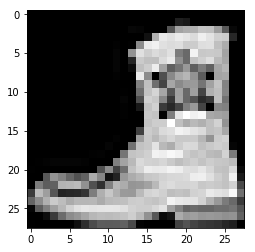

In [18]:
import  matplotlib.image as mplimg
img = mplimg.imread("train/4994.png")
plt.imshow(img)

In [0]:
from keras.preprocessing import image
train = pd.read_csv('train.csv')

In [68]:
train_images = []

for i in tqdm(range(train.shape[0])):
              img = image.load_img('train/' + train['id'][i].astype('str') + '.png', target_size = (28,28,1), grayscale = True)
              img = image.img_to_array(img)
              img = img/255
              train_images.append(img)
X = np.array(train_images)



  0%|          | 0/60000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 60000/60000 [00:18<00:00, 3316.63it/s]


In [69]:
X.shape

(60000, 28, 28, 1)

In [0]:
y = train["label"].values
y = to_categorical(y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
        

In [0]:
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [74]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 155s 3ms/step - loss: 0.4977 - acc: 0.8208 - val_loss: 0.3122 - val_acc: 0.8849
Epoch 2/10
48000/48000 [==============================] - 153s 3ms/step - loss: 0.3342 - acc: 0.8785 - val_loss: 0.2664 - val_acc: 0.8998
Epoch 3/10
48000/48000 [==============================] - 152s 3ms/step - loss: 0.2837 - acc: 0.8972 - val_loss: 0.2423 - val_acc: 0.9085
Epoch 4/10
48000/48000 [==============================] - 151s 3ms/step - loss: 0.2518 - acc: 0.9064 - val_loss: 0.2329 - val_acc: 0.9120
Epoch 5/10
48000/48000 [==============================] - 152s 3ms/step - loss: 0.2286 - acc: 0.9156 - val_loss: 0.2227 - val_acc: 0.9196
Epoch 6/10
48000/48000 [==============================] - 153s 3ms/step - loss: 0.2070 - acc: 0.9228 - val_loss: 0.2223 - val_acc: 0.9170
Epoch 7/10
48000/48000 [====